#글씨체 다운로드
##### 블록을 실행한 후에 런타임 재시작을 해줘야함

In [ ]:
!sudo apt-get install -y fonts-nanum #글씨체 
!sudo fc-cache -fv #글씨체
!rm ~/.cache/matplotlib -rf #글씨체

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (23.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and dir

#구글 드라이브 연동

In [ ]:
from google.colab import drive 
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#데이터 불러오기, 전처리

In [ ]:
import pandas as pd #pandas 모듈
import numpy as np #numpy 모듈               
import matplotlib.pyplot as plt #그래프 그리기 모듈
plt.rc('font', family='NanumBarunGothic') #matplotlib의 글씨체 - 한글 꺠짐 방지
plt.rcParams['axes.unicode_minus'] = False #matplotlib의 글씨체 - 한글 꺠짐 방지 
from matplotlib import font_manager, rc #글꼴 모듈
                                                
covid19_raw = pd.read_csv('/content/drive/MyDrive/python_code/code1/서울시 코로나19 자치구별 확진자 발생동향.csv', encoding = 'cp949') #한글로 된 csv파일을 불러올떄 cp949
#/content/drive/MyDrive/python_code/code1/서울시 코로나19 자치구별 확진자 발생동향.csv : 구글 드라이브에서의 csv파일 경로

In [ ]:
covid19_raw.columns #데이터의 모든 column을 나타냄

Index(['자치구 기준일', '종로구 전체', '종로구 추가', '중구 전체', '중구 추가', '용산구 전체', '용산구 추가',
       '성동구 전체', '성동구 추가', '광진구 전체', '광진구 추가', '동대문구 전체', '동대문구 추가', '중랑구 전체',
       '중랑구 추가', '성북구 전체', '성북구 추가', '강북구 전체', '강북구 추가', '도봉구 전체', '도봉구 추가',
       '노원구 전체', '노원구 추가', '은평구 전체', '은평구 추가', '서대문구 전체', '서대문구 추가', '마포구 전체',
       '마포구 추가', '양천구 전체', '양천구 추가', '강서구 전체', '강서구 추가', '구로구 전체', '구로구 추가',
       '금천구 전체', '금천구 추가', '영등포구 전체', '영등포구 추가', '동작구 전체', '동작구 추가', '관악구 전체',
       '관악구 추가', '서초구 전체', '서추구 추가', '강남구 전체', '강남구 추가', '송파구 전체', '송파구 추가',
       '강동구 전체', '강동구 추가', '기타 전체', '기타 추가'],
      dtype='object')

## 각 자치구의 기준일 기준 전체 확진자 수를 나타내는 컬럼만 추출하는 코드

In [ ]:
list_total = []
for i in range((len(covid19_raw.columns))):
    if '전체' in covid19_raw.columns[i]:#전체 데이터에서 '전체'이 포함되어 있으면 해당 값의 인덱스를 list_2022에 저장
        list_total.append(i)

In [ ]:
choose = list(covid19_raw.columns[list_total]) #columns에서 '전체'가 포함된 컬럼을 리스트로 저장
choose.append('자치구 기준일') #자치구 기준일을 리스트에 추가 

In [ ]:
df_total = covid19_raw.loc[:, choose] #choose리스트에 해당하는 column 추출

In [ ]:
df_total

,종로구 전체,중구 전체,용산구 전체,성동구 전체,광진구 전체,동대문구 전체,중랑구 전체,성북구 전체,강북구 전체,도봉구 전체,...,금천구 전체,영등포구 전체,동작구 전체,관악구 전체,서초구 전체,강남구 전체,송파구 전체,강동구 전체,기타 전체,자치구 기준일
0,64297,58105,99875,138277,168178,161929,176694,204255,130228,144137,...,110026,195099,189628,238302,190793,245579,313484,219050,295617,2022.09.25.00
1,64245,58042,99786,138136,168009,161788,176528,204052,130067,144004,...,109904,194920,189421,238032,190591,245363,313093,218811,295377,2022.09.24.00
2,64181,57976,99663,137950,167818,161607,176333,203823,129897,143827,...,109776,194687,189221,237739,190391,245102,312741,218548,294976,2022.09.23.00
3,64103,57900,99554,137794,167630,161405,176139,203565,129747,143679,...,109644,194424,188982,237479,190192,244827,312420,218264,294589,2022.09.22.00
4,64014,57810,99448,137600,167411,161212,175927,203314,129558,143470,...,109510,194175,188712,237197,189969,244535,312078,217999,294163,2022.09.21.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20.02.09.10
961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20.02.08.10
962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20.02.07.10
963,3,0,0,0,0,0,1,2,0,0,...,0,0,0,0,0,0,1,0,2,20.02.06.10


## '자치구 기준일'의 각 날짜값에서 특정 년도에 해당하는 값만 추출

In [ ]:
df_total['자치구 기준일']

0      2022.09.25.00
1      2022.09.24.00
2      2022.09.23.00
3      2022.09.22.00
4      2022.09.21.00
           ...      
960      20.02.09.10
961      20.02.08.10
962      20.02.07.10
963      20.02.06.10
964      20.02.05.10
Name: 자치구 기준일, Length: 965, dtype: object

In [ ]:
list_2021 = []
for i in range((len(df_total['자치구 기준일']))):
    if '2021' in df_total['자치구 기준일'][i]:
        list_2021.append(i)

In [ ]:
list_2022 = []
for i in range((len(df_total['자치구 기준일']))):
    if '2022' in df_total['자치구 기준일'][i]:
        list_2022.append(i)

In [ ]:
list_21_22 = list_2021 + list_2022
df_21_22 = df_total.loc[list_21_22,].reset_index(drop=True)

In [ ]:
df_21_22

,종로구 전체,중구 전체,용산구 전체,성동구 전체,광진구 전체,동대문구 전체,중랑구 전체,성북구 전체,강북구 전체,도봉구 전체,...,금천구 전체,영등포구 전체,동작구 전체,관악구 전체,서초구 전체,강남구 전체,송파구 전체,강동구 전체,기타 전체,자치구 기준일
0,3973,3671,5274,5707,7042,9385,8476,9488,6695,6718,...,5795,10507,8791,11265,8311,12452,13634,9229,16789,2021.12.31.00
1,3949,3649,5236,5664,6981,9313,8408,9417,6637,6662,...,5755,10429,8739,11196,8260,12366,13525,9123,16689,2021.12.30.00
2,3921,3626,5203,5611,6919,9250,8344,9331,6560,6608,...,5715,10353,8674,11120,8191,12282,13405,9031,16577,2021.12.29.00
3,3878,3593,5167,5569,6870,9152,8275,9249,6494,6556,...,5661,10266,8601,11043,8120,12215,13319,8940,16399,2021.12.28.00
4,3838,3570,5139,5530,6819,9091,8236,9142,6450,6501,...,5636,10224,8560,10992,8087,12148,13237,8883,16322,2021.12.27.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,4056,3784,5427,5867,7216,9630,8740,9737,6877,6905,...,5953,10719,8956,11502,8543,12806,14012,9521,17223,2022.01.05.00
630,4035,3764,5388,5829,7164,9564,8669,9675,6844,6861,...,5917,10673,8919,11453,8489,12706,13933,9463,17109,2022.01.04.00
631,4022,3747,5365,5809,7136,9532,8624,9627,6807,6832,...,5893,10645,8884,11406,8457,12649,13873,9414,17051,2022.01.03.00
632,4010,3726,5346,5775,7109,9494,8582,9592,6784,6799,...,5868,10610,8864,11371,8416,12585,13812,9369,16945,2022.01.02.00


## pivot table만들기

In [ ]:
choose

['종로구 전체',
 '중구 전체',
 '용산구 전체',
 '성동구 전체',
 '광진구 전체',
 '동대문구 전체',
 '중랑구 전체',
 '성북구 전체',
 '강북구 전체',
 '도봉구 전체',
 '노원구 전체',
 '은평구 전체',
 '서대문구 전체',
 '마포구 전체',
 '양천구 전체',
 '강서구 전체',
 '구로구 전체',
 '금천구 전체',
 '영등포구 전체',
 '동작구 전체',
 '관악구 전체',
 '서초구 전체',
 '강남구 전체',
 '송파구 전체',
 '강동구 전체',
 '기타 전체',
 '자치구 기준일']

In [ ]:
choose.remove('자치구 기준일') # choose list의 '전체'를 담은 모든 값을 column으로 활용하고자 '자치구 기준일'값을 제외  
df_21_22['자치구 기준일'] = pd.to_datetime(df_21_22['자치구 기준일'])  #'서울시 기준일'type바꿔주기
df_pivot = df_21_22.pivot_table(index='자치구 기준일', values = choose) #datafarme 형식을 pivottable로 변환
#.pivot_table(index = A, values = B) : 해당 데이터의 A값을 인덱스로, B값을 컬럼으로 하는 데이터 프레임을 만들어주는 함수
# values = choose : 위에서 자치구 기준일을 제외한 '전체'를 값에 포함하는 모든 컬럼을 담은 리스트

In [ ]:
df_pivot

,강남구 전체,강동구 전체,강북구 전체,강서구 전체,관악구 전체,광진구 전체,구로구 전체,금천구 전체,기타 전체,노원구 전체,...,성동구 전체,성북구 전체,송파구 전체,양천구 전체,영등포구 전체,용산구 전체,은평구 전체,종로구 전체,중구 전체,중랑구 전체
자치구 기준일,,,,,,,,,,,,,,,,,,,,,
2021-01-01,935,581,444,1341,1024,463,625,326,2300,813,...,450,813,1118,726,694,418,787,404,282,802
2021-01-02,938,591,458,1354,1030,465,628,327,2324,824,...,460,823,1126,733,709,425,800,414,283,810
2021-01-03,941,603,477,1363,1034,470,636,331,2340,834,...,460,831,1138,756,717,428,805,418,283,813
2021-01-04,952,611,491,1378,1040,479,645,336,2470,845,...,469,839,1146,766,731,429,808,422,285,827
2021-01-05,962,622,507,1382,1046,485,654,343,2482,851,...,473,846,1157,775,742,433,815,426,286,838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-21,244535,217999,129558,270388,237197,167411,192889,109510,294163,242768,...,137600,203314,312078,207795,194175,99448,214935,64014,57810,175927
2022-09-22,244827,218264,129747,270766,237479,167630,193137,109644,294589,243094,...,137794,203565,312420,208036,194424,99554,215218,64103,57900,176139
2022-09-23,245102,218548,129897,271072,237739,167818,193370,109776,294976,243378,...,137950,203823,312741,208264,194687,99663,215499,64181,57976,176333


In [ ]:
monthly_covid = df_pivot.resample('M').last() #일수 데이터를 달 단위로 묶어 정리 - last : 
monthly_covid

,강남구 전체,강동구 전체,강북구 전체,강서구 전체,관악구 전체,광진구 전체,구로구 전체,금천구 전체,기타 전체,노원구 전체,...,성동구 전체,성북구 전체,송파구 전체,양천구 전체,영등포구 전체,용산구 전체,은평구 전체,종로구 전체,중구 전체,중랑구 전체
자치구 기준일,,,,,,,,,,,,,,,,,,,,,
2021-01-31,1154,759,617,1550,1183,581,802,394,2894,1022,...,584,1016,1356,947,873,522,977,515,355,1001
2021-02-28,1278,917,740,1649,1369,734,1039,465,3315,1207,...,703,1224,1566,1085,1045,757,1131,557,443,1168
2021-03-31,1500,1166,862,1774,1492,987,1162,490,3548,1419,...,842,1361,1757,1199,1172,888,1354,620,522,1356
2021-04-30,1939,1418,997,1991,1793,1228,1306,575,3872,1677,...,1033,1566,2146,1376,1376,994,1694,680,587,1696
2021-05-31,2457,1737,1251,2183,2028,1436,1489,719,4131,2028,...,1202,1827,2591,1539,1624,1160,1923,758,670,1973
2021-06-30,3212,2006,1417,2388,2284,1668,1649,824,4464,2269,...,1429,2059,3007,1720,1886,1398,2133,821,747,2151
2021-07-31,4488,2528,1771,2957,3386,2135,2203,1141,5130,2831,...,1914,2548,3837,2128,2534,1876,2672,1019,943,2569
2021-08-31,5733,2975,2101,3602,4395,2657,2819,1516,5920,3244,...,2275,3065,4741,2713,3370,2321,3381,1245,1197,3092
2021-09-30,6976,3841,2656,4492,5457,3534,4232,2102,7060,3962,...,2862,3811,6419,3327,4497,2733,4308,1646,1736,3760


# 그래프 그리기

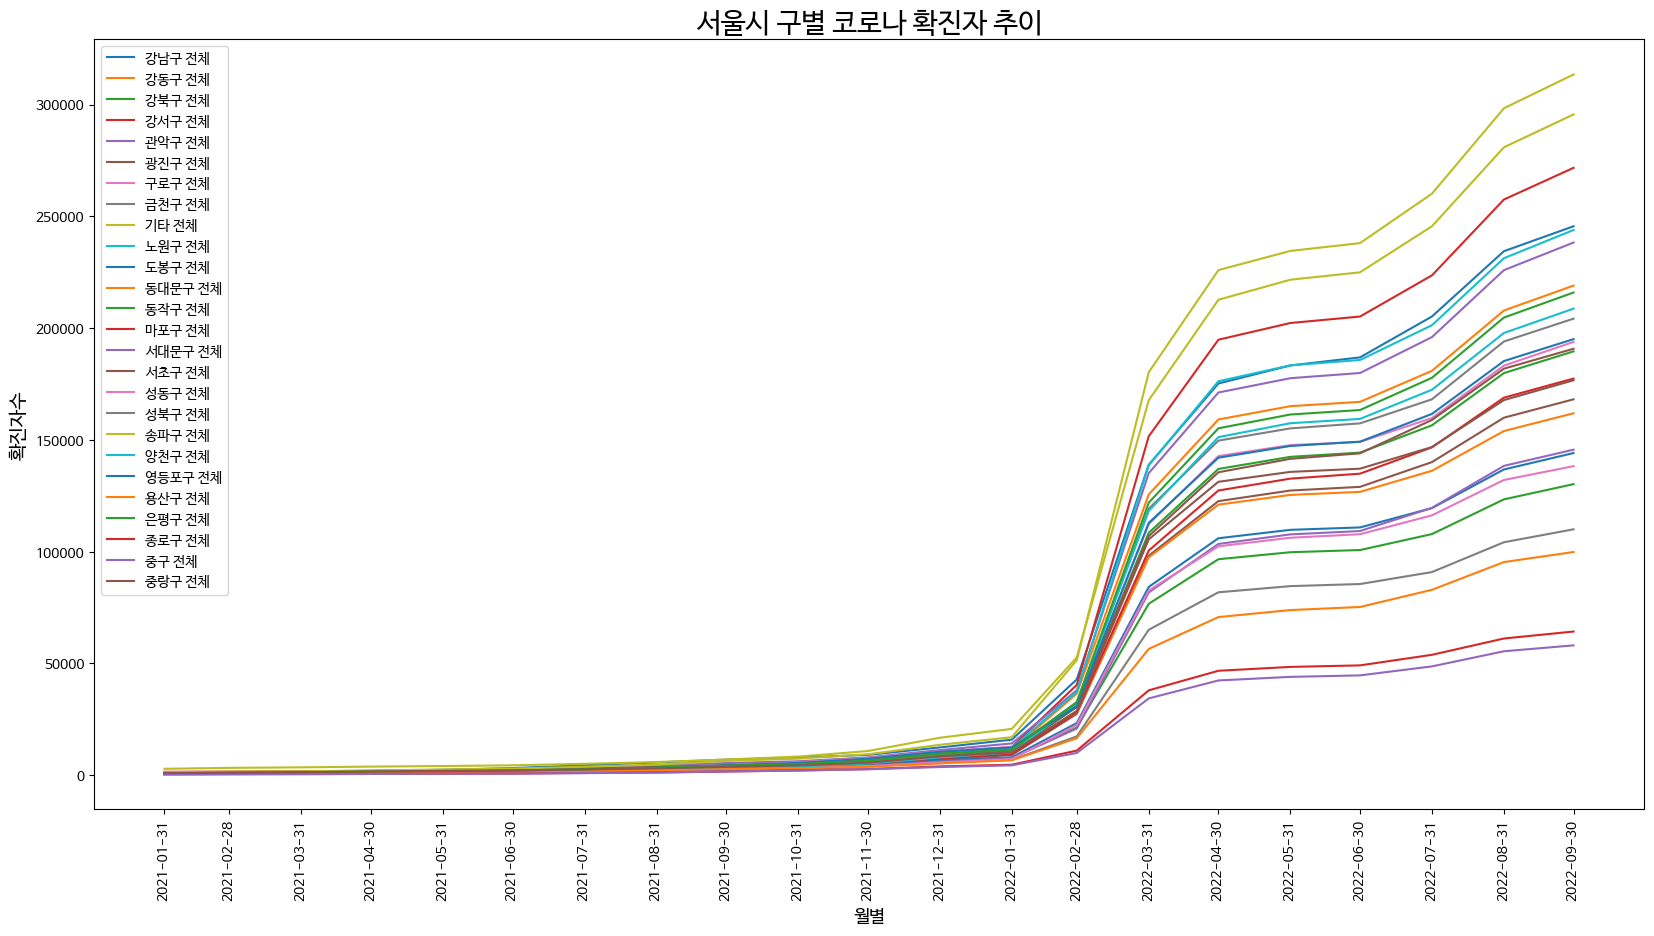

In [ ]:
df_name = monthly_covid.columns #monthly_covid(주 간격 피벗테이블)을 df_name에 저장
plt.figure(figsize = (20,10)) #그래프 크기(가로 길이, 세로 길이)
#3w_covid = weekly_covid
for df in df_name:# df값 = 서울시 확진자, 전국 확진 - 각 컬럼에 해당하는 그래프를 for문을 돌면서 각각 그림
    plt.plot(monthly_covid[df], label = df) # 데이터 가져오기 - data framedm을 그대로 가져오고, label을 'data'로
    plt.legend() #범례표시
    plt.title('서울시 구별 코로나 확진자 추이', fontsize = 20) #그래프 제목
    plt.xlabel('월별', fontsize = 13) #x축 제목
    plt.ylabel('확진자수', fontsize = 14) #y축 제목
    plt.xticks(monthly_covid.index.to_list(), rotation=90) #x축 간격, rotation=90 = 글씨 90도로 돌리기